In [7]:
import random
import matplotlib.pyplot as plt 

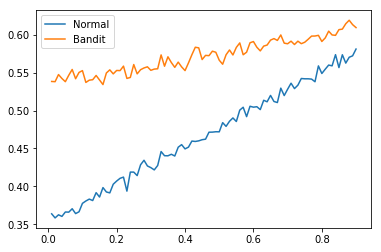

In [8]:
def main(): #plots p(success by trial and without formula)
    alpha = 0.7 # initialising values of alpha which remains constatnt
    beta = 0.01 # we keep incrementing beta by 0.01
    x=[]
    y=[]
    xBandit=[]
    yBandit=[]
    sampleSize=100
    A = []
    B = []
    for i in range(90): # beta is incremented 90 times and each time the probability of success is calculated 
        x.append(beta)
        xBandit.append(beta)
        for i in range(int(round(alpha*sampleSize))): # we are building the success/fail samples for treatment A and treatment B based on alpha and beta and we'll randomly choose an element. 
            A.append(1)
        for i in range(int(round((1-alpha)*sampleSize))):
            A.append(0)
        for i in range(int(round(beta*sampleSize))):
            B.append(1)
        for i in range(int(round((1-beta)*sampleSize))):
            B.append(0)
        random.shuffle(A)
        random.shuffle(B)
        trials = 10000
        SF=[] # stores the sccuss/fail for each trial/patient for normal strategy
        histNormal=[]
        SFbandit=[]# stores success/fail for each trial/patient for two armed bandit
        histBandit=[]
        flag=0
        curr= ''
        for i in range(trials): # for 10000 trials we genereate outcomes of using normal Strategy i..e for each patient we randomly choose the treatment everytime 
            # normal        
            treatment = random.randint(0,1)
            histNormal.append(treatment)
            if(treatment==0):
                outcome = A[random.randint(0,len(A)-1)]
                if(outcome==0):
                    SF.append(0)
                else:
                    SF.append(1)
            else:
                outcome = B[random.randint(0,len(B)-1)]
                if(outcome==0):
                    SF.append(0)
                else:
                    SF.append(1)
            # two-arm bandit
            if(flag==0): # for 10000 trials we generate outcomes of using two bandit strategy 
                treatment = random.randint(0,1)
                histBandit.append(treatment)
                flag=1
                if(treatment==0):
                    outcome = A[random.randint(0,len(A)-1)]
                    if(outcome==0):
                        SFbandit.append(0)
                        curr = 'B'

                    else:
                        SFbandit.append(1)
                        curr='A'

                else:
                    outcome = B[random.randint(0,len(B)-1)]
                    if(outcome==0):
                        SFbandit.append(0)
                        curr='A'
                    else:
                        SFbandit.append(1)
                        curr='B'
            else:
                if(curr=='A'):
                    outcome = A[random.randint(0,len(A)-1)]
                    if(outcome==0):
                        SFbandit.append(0)
                        
                        curr = 'B'
                        histBandit.append(1)

                    else:
                        SFbandit.append(1)
                        curr='A'
                        histBandit.append(0)
                elif(curr=='B'):
                    outcome = B[random.randint(0,len(B)-1)]
                    if(outcome==0):
                        SFbandit.append(0)
                        curr='A'
                        histBandit.append(0)
                    else:
                        SFbandit.append(1)
                        curr='B'
                        histBandit.append(1)

        #print(float(sum(SF))/len(SF),"Normal")
        y.append(float( sum(SF) ) / len(SF) )
        yBandit.append(float( sum(SFbandit) ) / len(SFbandit) )
        beta+=0.01
        #print(float(sum(SFbandit))/len(SFbandit),"Bandit")

    plt.plot(x,y,label="Normal")
    plt.plot(xBandit,yBandit,label="Bandit")
    plt.legend()
    plt.show()
    



        

main()

For different values of beta varying from 0.1 to 0.99 the above graph represents the P(success) for the two strategies plotted against varying beta. Check notes for theory

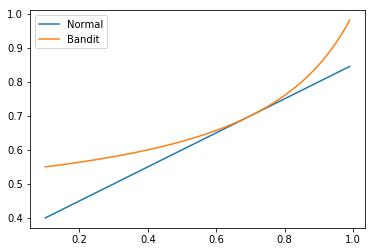

In [9]:
def plotUsingFormula(): #plots using the P(success generated for both)
    alpha = 0.7
    beta=0.1
    x=[]
    y=[]
    xBandit=[]
    yBandit=[]
    for i in range(90):
        x.append(beta)
        xBandit.append(beta)
        Pr = (1.0/2) * (alpha+beta)
        Pt = (alpha+beta - 2*alpha*beta)/(2-alpha-beta)
        
        y.append(Pr)
        yBandit.append(Pt)
        beta+=0.01
    plt.plot(x,y,label="Normal")
    plt.plot(xBandit,yBandit,label="Bandit")
    plt.legend()
    plt.show()

plotUsingFormula()